# Charts and Tables

- `matplotlib` can be used to create simple charts (histograms, line charts, etc.). See: https://matplotlib.org/

- `pandas` can be used for data frames (tables).

## Create some data

In [6]:
import numpy as np  
import pandas as pd

# create some artificial performance data for 3 agents and 100 runs of a O(n^2) algorithm 
# create data for problem size n = 1 .. 100.
n_max = 100
runtime = {
    "agent 1" : np.abs(np.add(np.power(np.divide(range(n_max), 10), 2), 
                              np.random.normal(loc = 0, scale = 10, size = n_max))),
    "agent 2" : np.abs(np.add(np.power(np.divide(range(n_max),  5), 2), 
                              np.random.normal(loc = 0 , scale = 10, size = n_max))),
    "agent 3" : np.abs(np.add(np.power(np.divide(range(n_max), 12), 2), 
                              np.random.normal(loc = 0 , scale = 10, size = n_max)))
}

# show data as a data frame using pandas
df = pd.DataFrame(runtime)
df

,agent 1,agent 2,agent 3
0,3.696819,11.200766,7.764755
1,0.579025,26.487413,9.094172
2,16.210992,13.501417,4.893713
3,22.475210,11.815958,2.359137
4,6.599509,15.696563,15.527946
...,...,...,...
95,83.749767,367.388381,50.922100
96,80.888357,349.662123,65.244044
97,86.390096,389.051239,68.088596
98,97.557604,378.330725,65.224039


In [7]:
# create data for n = 10 and N = 100 replications, so we can compare distributions.
N = 100
performance = {
    "agent 1" : np.add(100, np.random.normal(loc = 0, scale = 10, size = N)),
    "agent 2" : np.add(120, np.random.normal(loc = 0, scale = 20, size = N)),
    "agent 3" : np.add(70,  np.random.normal(loc = 0, scale =  5, size = N))
}

# show data as a data frame using pandas
df = pd.DataFrame(performance)
df

,agent 1,agent 2,agent 3
0,103.594035,158.211407,70.935873
1,106.498795,98.384855,70.495022
2,108.678531,85.694487,71.722246
3,82.836181,102.129595,69.295993
4,93.753413,149.620122,74.670265
...,...,...,...
95,94.407753,138.985612,67.451695
96,96.206428,95.637326,75.621212
97,95.225267,151.856961,79.422541
98,100.057024,133.949732,76.595392


## Charts 

### Line Charts

Plot run time as a function of problem size $n = 1, ...$. This can be used to compare the runtime and look at scalability. In this example, the run time increase with n by $O(n^2)$. Often, you run each size $n$ several times and average the runtime.

In [8]:
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")

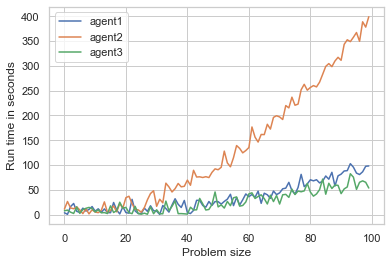

In [9]:
x = range(N)
plt.plot(x, runtime["agent 1"], label = "agent1") 
plt.plot(x, runtime["agent 2"], label = "agent2") 
plt.plot(x, runtime["agent 3"], label = "agent3") 
plt.xlabel("Problem size")
plt.ylabel("Run time in seconds")
plt.legend()
plt.show()

### Scatter plots

Compare $N$ runs of a fixed problem size of $n=10$. Here the runtimes of the two agents are not correlated (because I randomly generated the data). Most of the points are above the diagonal indicating that agent 2 has higher performance.

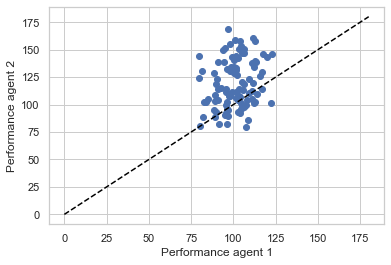

In [10]:
plt.scatter(performance["agent 1"], performance["agent 2"]) 
plt.xlabel("Performance agent 1")
plt.ylabel("Performance agent 2")
plt.plot([0, 180], [0, 180], "--", color = "black")
plt.show()

### Bar plots

Compare the average performance performance.

Mean performance: [100.83511833 118.81081306  70.83620673]


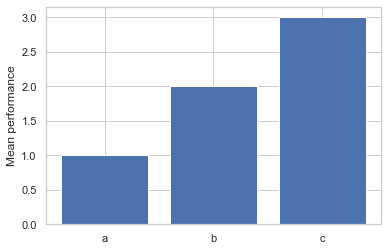

In [17]:
mean_performance = np.mean(list(performance.values()), axis = 1)

print(f"Mean performance: {mean_performance}")

plt.bar(["a","b","c"], [1,2,3])
plt.ylabel("Mean performance")
plt.show()

### Histograms

Show the distribution of the performance for an agent.

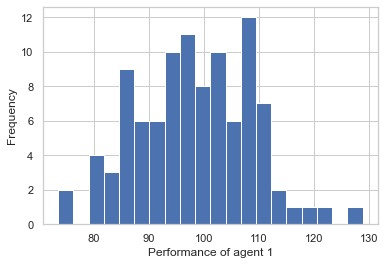

In [10]:
plt.hist(performance["agent 1"], bins = 20)
plt.xlabel("Performance of agent 1")
plt.ylabel("Frequency")
plt.show()

Use histograms to compare the performance distribution between agents.

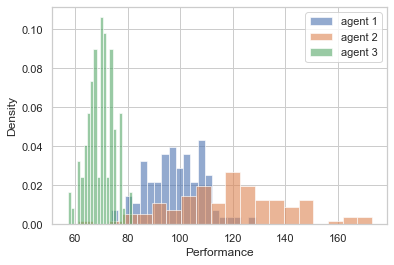

In [11]:
plt.hist(performance["agent 1"], bins = 20, alpha = .6, density=True)
plt.hist(performance["agent 2"], bins = 20, alpha = .6, density=True)
plt.hist(performance["agent 3"], bins = 20, alpha = .6, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["agent 1", "agent 2", "agent 3"])
plt.show()

### Boxplots

Compares distributions using a simplified representation of the histogram as a box (containing the middle 50% of the data) with wiskers. The notches (cutouts) around the median show the 95% confidence interval around the median. If the notches between two boxes do not overlap, then one is significantly better than the other (at a p-value of 0.05). In this case, agent 2 is significantly better than agent 1. 

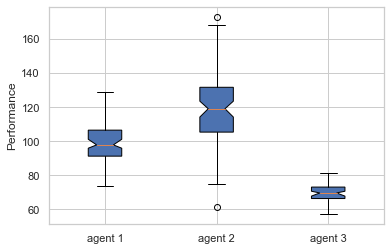

In [12]:
bplot = plt.boxplot(list(performance.values()),
                     notch = True,                 # show 95% confidence intervals around the median
                     bootstrap = 1000,             # used to calculate the notches
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = performance.keys())  # will be used to label x-ticks
plt.ylabel("Performance")
plt.show()

## Show Tables

Markdown tables can be produced using markdown syntax (see https://www.markdownguide.org/extended-syntax/):

```
| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |
```

Here is the resulting table

| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |

Tables in code can be printed in several ways. The easiest is to use `pandas` dataframes. Unfortunately, it cannot print custom row names.

In [13]:
import numpy as np

data = np.array([[1, 2], [3 ,4], [5, 6]])

print(data)



[[1 2]
 [3 4]
 [5 6]]


In [14]:
import pandas as pd
pd.DataFrame(data, columns=["x", "y"])

,x,y
0,1,2
1,3,4
2,5,6
